In [68]:
import numpy as np
import pandas as pd

In [69]:
data = pd.read_csv("ODI-2022.csv", delimiter= ";")


In [70]:
data.describe()        


,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,50,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


<AxesSubplot:>

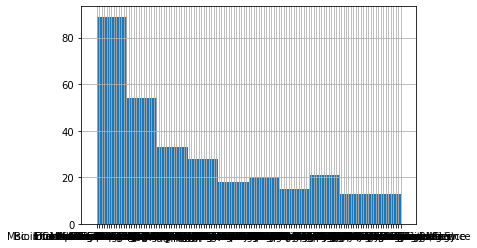

In [71]:
data['What programme are you in?'].hist()

<AxesSubplot:>

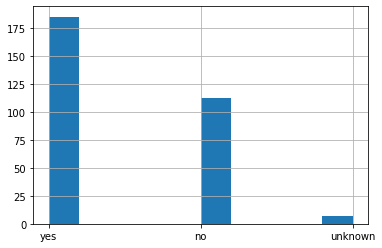

In [72]:
data['Have you taken a course on machine learning?'].hist()

<AxesSubplot:>

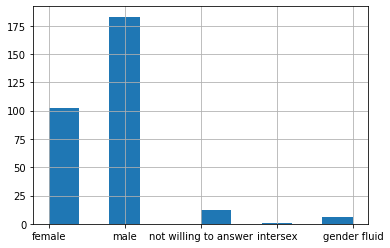

In [73]:
data['What is your gender?'].hist()

<AxesSubplot:>

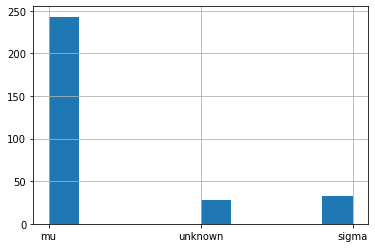

In [74]:
data['Have you taken a course on statistics?'].hist()

<AxesSubplot:>

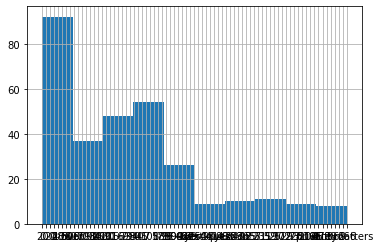

In [75]:
data['What is your stress level (0-100)?'].hist()

In [76]:
data_chocoandstress = data.iloc[:,[7,11]]
data_chocoandstress.rename(columns={'Chocolate makes you.....':'Chocolate','What is your stress level (0-100)?':'Stress'}, inplace=True)
data_chocoandstress

C:\Users\nishi\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Chocolate,Stress
0,neither,0
1,fat,200
2,fat,0
3,neither,20
4,fat,2
...,...,...
299,fat,30
300,slim,9
301,I have no idea what you are talking about,666
302,neither,70


In [77]:
data_chocoandstress['Stress']

0        0
1      200
2        0
3       20
4        2
      ... 
299     30
300      9
301    666
302     70
303     66
Name: Stress, Length: 304, dtype: object

In [78]:
data_chocoandstress.head(85)

,Chocolate,Stress
0,neither,0
1,fat,200
2,fat,0
3,neither,20
4,fat,2
...,...,...
80,slim,10
81,neither,61
82,neither,100
83,fat,89


In [79]:
data_chocoandstress = data_chocoandstress.drop(labels=[15,85,95,120,136,277,289], axis=0)

In [80]:
data_chocoandstress.head(287)

,Chocolate,Stress
0,neither,0
1,fat,200
2,fat,0
3,neither,20
4,fat,2
...,...,...
288,neither,80
290,neither,42
291,slim,10
292,fat,60


In [81]:
data_chocoandstress['Stress'] = pd.to_numeric(data_chocoandstress['Stress'])

In [103]:
df_filtered = data_chocoandstress[data_chocoandstress['Stress'] <=100  ]
df_filtered1 = df_filtered[df_filtered['Stress'] >=0  ]
df_filtered1


,Chocolate,Stress
0,neither,0.0
2,fat,0.0
3,neither,20.0
4,fat,2.0
5,fat,48.0
...,...,...
298,neither,50.0
299,fat,30.0
300,slim,9.0
302,neither,70.0


Chocolate
I have no idea what you are talking about    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
fat                                          [[AxesSubplot(0.125,0.125;0.775x0.755)]]
neither                                      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
slim                                         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
unknown                                      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

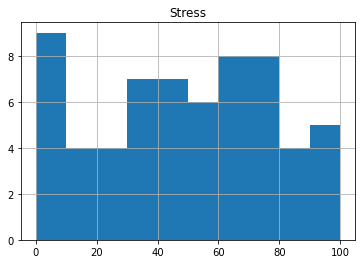

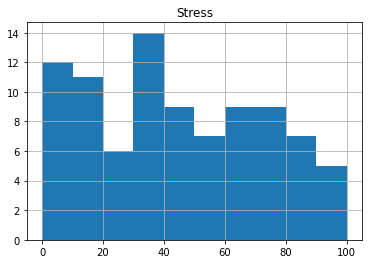

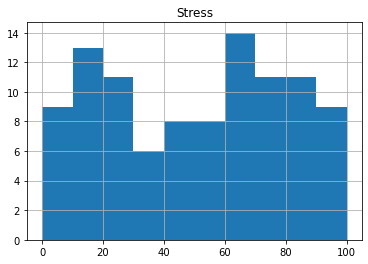

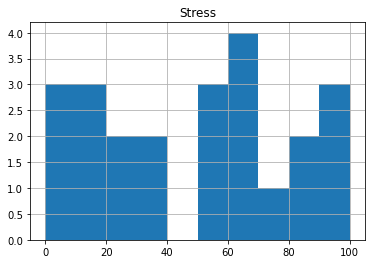

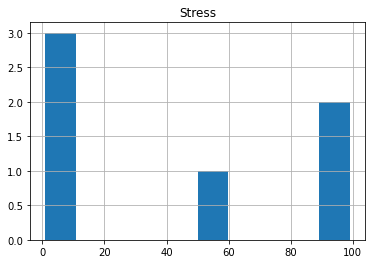

In [104]:
df_groupby_sex = df_filtered1.groupby('Chocolate')
df_groupby_sex.hist()

In [105]:
df_groupby_sex.describe()

Stress                             \
                                           count       mean        std  min   
Chocolate                                                                     
I have no idea what you are talking about   62.0  46.633871  30.020588  0.0   
fat                                         89.0  42.404494  29.295407  0.0   
neither                                    100.0  47.520000  30.216217  0.0   
slim                                        23.0  46.956522  32.757342  0.0   
unknown                                      6.0  44.833333  45.261094  1.0   

                                                                     
                                            25%   50%    75%    max  
Chocolate                                                            
I have no idea what you are talking about  20.0  47.9  70.00  100.0  
fat                                        19.0  40.0  65.00  100.0  
neither                                    20.0  50.0  70.00  100.0  
slim                                       15.0  50.0  69.50  100.0  
unknown                                    10.0  30.0  86.75   99.0